In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import mlflow.artifacts
import pandas as pd
from hydra import compose, initialize
from omegaconf import OmegaConf


plt.style.use("ggplot")

In [2]:
with initialize(version_base=None, config_path="../configs"):
    config = compose(config_name="uris")

OmegaConf.resolve(config)

In [3]:
tiling_ikem = Path(
    mlflow.artifacts.download_artifacts(artifact_uri=config.uris.tiling.ikem)
)
tiles_ikem = pd.read_parquet(tiling_ikem / "train - ikem" / "tiles.parquet")

tiling_ftn = Path(
    mlflow.artifacts.download_artifacts(artifact_uri=config.uris.tiling.ftn)
)
tiles_ftn = pd.read_parquet(tiling_ftn / "train - ftn" / "tiles.parquet")

In [27]:
def plot_distribution(tiles: pd.DataFrame, column: str) -> None:
    plt.hist(tiles[column], bins=100)
    plt.xlabel(column)
    plt.title(column.capitalize())
    plt.show()

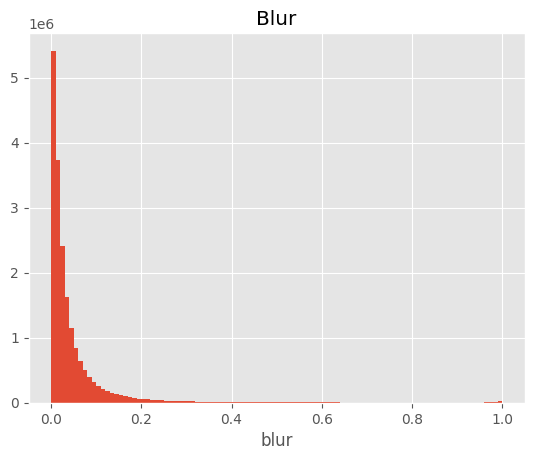

In [30]:
plot_distribution(tiles_ikem, "blur")

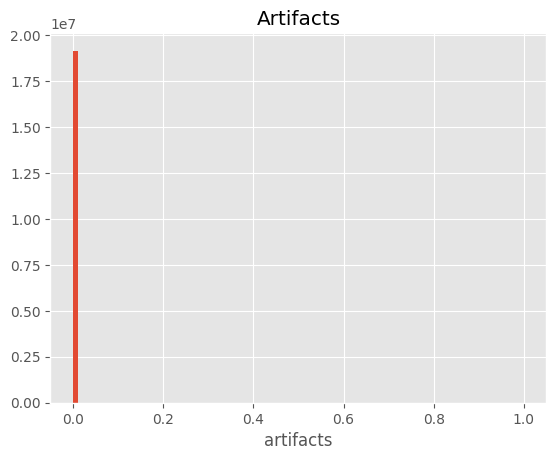

In [34]:
plot_distribution(tiles_ikem, "artifacts")

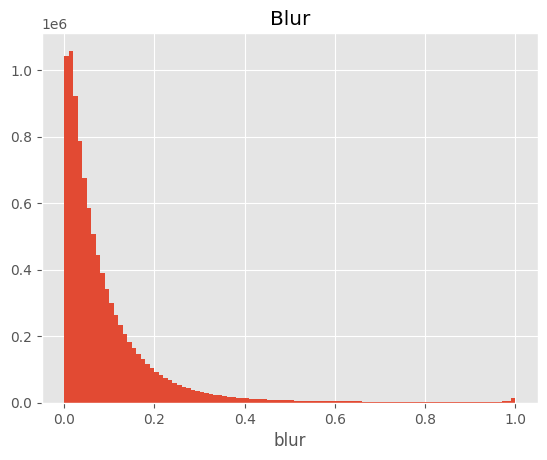

In [35]:
plot_distribution(tiles_ftn, "blur")

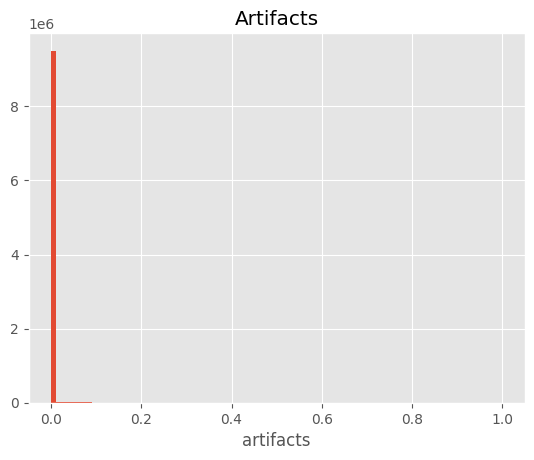

In [36]:
plot_distribution(tiles_ftn, "artifacts")

In [43]:
def plot_cumulative_distribution(tiles: pd.DataFrame, column: str) -> None:
    sorted_values = tiles[column].sort_values()
    cumulative = len(sorted_values) - sorted_values.rank(method="first")
    plt.plot(sorted_values, cumulative)
    plt.xlabel("Threshold")
    plt.title(column.capitalize())
    plt.ylabel("Count > Threshold")
    plt.grid(True)
    plt.show()

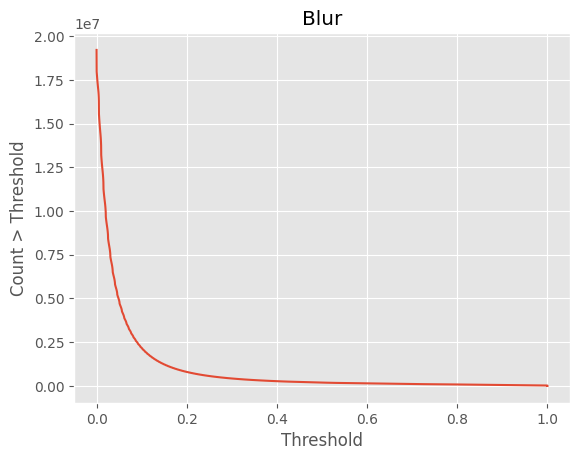

In [44]:
plot_cumulative_distribution(tiles_ikem, "blur")

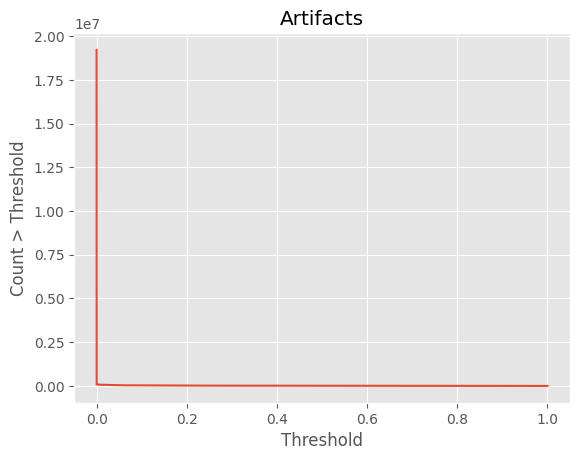

In [45]:
plot_cumulative_distribution(tiles_ikem, "artifacts")

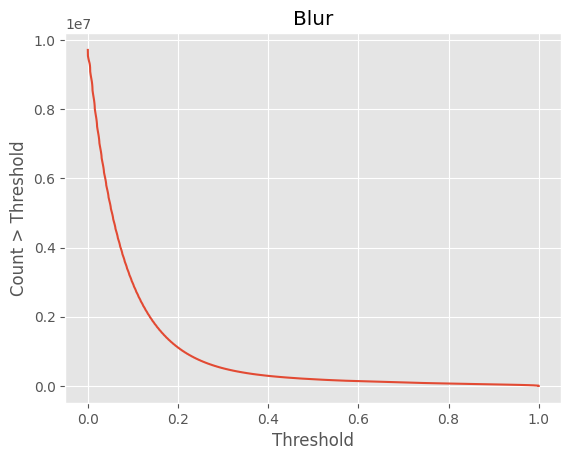

In [46]:
plot_cumulative_distribution(tiles_ftn, "blur")

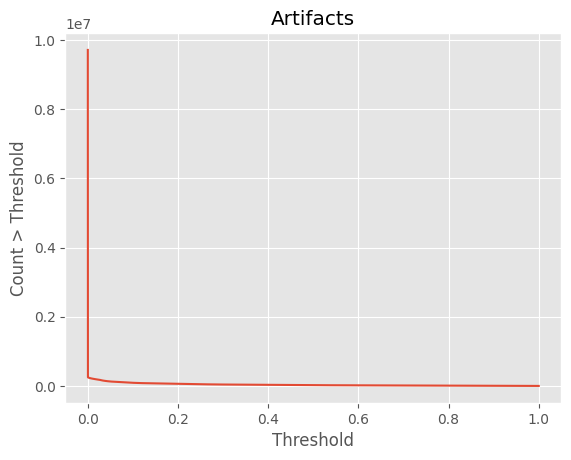

In [47]:
plot_cumulative_distribution(tiles_ftn, "artifacts")